# Used Car Price Prediction Project:

Submitted by - AMAN KUMAR PATEL

BATCH - INTERNSHIP 25

SME - MD. KASHIF

STATEMENT: With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#importing dataset
df = pd.read_excel("used_car.xlsx") #Reading excel file
df.head()

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,341 Litres,1675,1620,3655,1340,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,256-liters,1520,1660,3765,-,8,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,494,1467,1699,4390,1750,-,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,270,1564,1520,3565,1170,9.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,180-liters,1700,1495,3599,1350,9,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


Since i have to predict the used car price and the Car_Price column is a continuous data so it's a **Regression problem**.

Since Unnamed: 0 is an index column so let's drop it here itself.

In [4]:
#Droping unnecessary column
df = df.drop(["Unnamed: 0"],axis=1)

In [5]:
#Checking shape of the dataset
df.shape

(12608, 20)

My dataset has 12608 rows and 20 columns.

In [6]:
#Checking all column names
df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

Above are the list of column names in the dataset.

In [7]:
#Checking for missing values
df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp             0
Gear_transmission       0
Milage_in_km/ltr        0
Seating_cap            55
color                   0
Max_power               1
front_brake_type       76
rear_brake_type        76
cargo_volume          447
height                 56
width                  56
length                 56
Weight                 37
Insp_score              0
top_speed            1798
City_url                0
Car_price               0
dtype: int64

There are some entries like '-' and 'null' so let's replace these with nan.

In [8]:
#Replacing unnecessary entries
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [9]:
#Checking for nan values again
df.isnull().sum()

Car_Name                 0
Fuel_type                0
Running_in_kms           0
Endine_disp             60
Gear_transmission        0
Milage_in_km/ltr        29
Seating_cap            104
color                  274
Max_power              145
front_brake_type       214
rear_brake_type        215
cargo_volume          8388
height                 254
width                  255
length                 254
Weight                6074
Insp_score           10876
top_speed             4316
City_url                 0
Car_price                0
dtype: int64

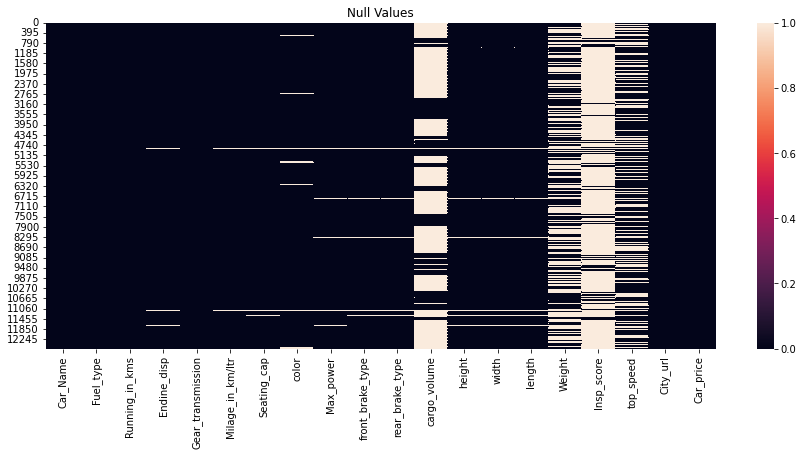

In [10]:
#Visualizeing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is huge null values in the dataset.

In cargo_volume and Insp_score there is more than 50% null values so let's drop those columns.

In [11]:
#Dropping unnecessary columns
df.drop(columns = ['cargo_volume','Insp_score'], inplace = True)

In [12]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12608 entries, 0 to 12607
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           12608 non-null  object
 1   Fuel_type          12608 non-null  object
 2   Running_in_kms     12608 non-null  object
 3   Endine_disp        12548 non-null  object
 4   Gear_transmission  12608 non-null  object
 5   Milage_in_km/ltr   12579 non-null  object
 6   Seating_cap        12504 non-null  object
 7   color              12334 non-null  object
 8   Max_power          12463 non-null  object
 9   front_brake_type   12394 non-null  object
 10  rear_brake_type    12393 non-null  object
 11  height             12354 non-null  object
 12  width              12353 non-null  object
 13  length             12354 non-null  object
 14  Weight             6534 non-null   object
 15  top_speed          8292 non-null   object
 16  City_url           12608 non-null  objec

Above is the info about the dataset and i can see some missing values in the dataset. I have to take care of those missing values.

# Feature Extraction:

## Car_Name: 
Since Car_name column has year of manufacture, car model and car name all together so we have to separate them.

In [13]:
#Extracting manufacturing year and car name from Car_Name
df['Manu_year'] = df['Car_Name'].str[0:4]
df['car_name'] = df['Car_Name'].str[4:]
df.drop(columns = 'Car_Name', inplace = True)

In [14]:
df['Car_Brand'] = df.car_name.str.split(' ').str.get(1)
df['Car_Model'] = df.car_name.str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')
df.drop(columns = 'car_name', inplace = True)

## Car_Price:

Since Car_Price is our target it should be in the format of continuous data, so we have change the car_price column from lakhs and crores to integer format.

In [15]:
df['car_price'] = df['Car_price'].str.replace('Lakh','100000')
df['car_price'] = df['car_price'].str.replace(',','')
df['car_price'] = df['car_price'].str.replace('Cr','10000000')

In [16]:
df[['a','b']] = df.car_price.str.split(expand=True)

In [17]:
df['a'] = df['a'].astype('float')
df['b'] = df['b'].astype('float')

In [18]:
#Checking for null values in b column
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp            60
Gear_transmission       0
Milage_in_km/ltr       29
Seating_cap           104
color                 274
Max_power             145
front_brake_type      214
rear_brake_type       215
height                254
width                 255
length                254
Weight               6074
top_speed            4316
City_url                0
Car_price               0
Manu_year               0
Car_Brand               0
Car_Model               0
car_price               0
a                       0
b                      91
dtype: int64

In [19]:
df['b']=df['b'].fillna(value = 1)

In [20]:
df['car_price'] = df['a'] * df['b']

In [21]:
df.drop(columns = ['Car_price','a','b'], inplace = True)

## Running_in_kms:

Since this column should be int datatype but it has some string values and ',' in between so let's replace them.

In [22]:
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace('1 Lakh ','100000')
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

In [23]:
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Manu_year             object
Car_Brand             object
Car_Model             object
car_price            float64
dtype: object

## Engine_disp:

The column 'Endine_disp' should be continuous column so i will convert it to float datatype.

In [24]:
df.Endine_disp = df.Endine_disp.astype('float')

## Milage_in_km/ltr:


In Milage_in_km/ltr column the data type is object so we have to change this to float type.

In [25]:
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')

df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

## Converting the data type of columns height, width and length to float datatype:

In [26]:
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')
df.height = df.height.astype('float')
df.width = df.width.astype('float')
df.length = df.length.astype('float')

## Weight:

The datatype of Weight has to be changed to float.

In [27]:
#getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str[0:4]

df.Weight = df.Weight.astype('float')

## top_speed:

Let's change the datatype of top_speed column to float.

In [28]:
#getting numerical values from top_speed column
df['top_speed'] = df['top_speed'].str[0:3]
df.top_speed = df.top_speed.astype('float')

## City_url:

Let's extract city name from city url column.

In [29]:
#Checking value counts of City_url column
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+delhi-ncr    1490
https://www.cardekho.com/used-cars+in+bangalore    1486
https://www.cardekho.com/used-cars+in+mumbai       1478
https://www.cardekho.com/used-cars+in+new-delhi    1473
https://www.cardekho.com/used-cars+in+pune         1239
https://www.cardekho.com/used-cars+in+gurgaon      1040
https://www.cardekho.com/used-cars+in+noida         982
https://www.cardekho.com/used-cars+in+hyderabad     918
https://www.cardekho.com/used-cars+in+chennai       836
https://www.cardekho.com/used-cars+in+kolkata       595
https://www.cardekho.com/used-cars+in+ahmedabad     579
https://www.cardekho.com/used-cars+in+jaipur        492
Name: City_url, dtype: int64

In [30]:
#Replacing city names from city urls
df['city_name'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+mumbai', 'mumbai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'hyderabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+pune', 'pune')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'delhi-ncr')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'ahmedabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'gurgaon')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+noida', 'noida')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+kolkata', 'kolkata')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+jaipur', 'jaipur')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'new-delhi')

In [31]:
#Let's check the value count again
df['city_name'].value_counts()

delhi-ncr    1490
Bangalore    1486
mumbai       1478
new-delhi    1473
pune         1239
gurgaon      1040
noida         982
hyderabad     918
Chennai       836
kolkata       595
ahmedabad     579
jaipur        492
Name: city_name, dtype: int64

Since we have extracted city names let's drop City_url.

In [32]:
#Dropping unnecessary column
df.drop(columns = 'City_url', inplace = True)

## Seating_cap:

Let's change the data type of seating_cap to float type.

In [33]:
#converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

## Manu_Year:

Let's extract car age from manufactured year.

In [34]:
df.Manu_year = df.Manu_year.astype('float')
df['Car_age'] = 2021 - df['Manu_year']
df.drop(columns = 'Manu_year', inplace = True)

## Max_power:

We have to change the datatype of Max_power column to float datatype.

In [35]:
#getting numerical values from column Max_power and converting them to float type
df['Max_power'] = df['Max_power'].str[0:5]

In [36]:
df['Max_power'] = df['Max_power'].str.replace('PS','')
df['Max_power'] = df['Max_power'].str.replace('ps','')
df['Max_power'] = df['Max_power'].str.replace('Bh','')
df['Max_power'] = df['Max_power'].str.replace('P','')

In [37]:
df.Max_power = df.Max_power.astype('float')

## front_brake_type:

Let's group the similar entries in this column.

In [38]:
#Checking the value counts of front_brake_type
df['front_brake_type'].value_counts()

Disc                                        6902
Ventilated Disc                             4785
Solid Disc                                   181
Ventilated Discs                             141
Disc & Caliper Type                           83
Disk                                          73
Ventilated DIsc                               51
Ventilated discs                              33
Drum                                          25
Ventilated Disk                               17
Multilateral Disc                             14
264mm Ventilated discs                        13
Electric Parking Brake                        11
Vantilated Disc                               10
Vacuum assisted hydraulic dual circuit w       7
Disc & Drum                                    7
Discs                                          6
Disc,internally ventilated                     6
Disc, 236 mm                                   5
disc                                           4
Ventillated Disc    

In [39]:
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Disc,internally ventilated","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Booster assisted ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [40]:
#Checking the value counts of front_brake_type again
df['front_brake_type'].value_counts()

Disc                                        7171
Ventilated Disc                             5070
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Carbon ceramic                                 2
Mechanical-hydraulic dual circuit              1
Ventilated & Grooved Steel Discs               1
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Name: front_brake_type, dtype: int64

## rare_brake_type:

Let's group the similar entries in this column.

In [41]:
#Checking value counts of rare_break_type column
df['rear_brake_type'].value_counts()

Drum                                        10022
Disc                                         1409
Ventilated Disc                               296
Solid Disc                                    208
Leading-Trailing Drum                         103
Disc & Caliper Type                            83
Self-Adjusting Drum                            50
Discs                                          42
Ventilated discs                               32
Ventilated Discs                               25
Drums                                          20
262mm Disc & Drum Combination                  13
Disc & Drum                                    12
Self Adjusting Drum                            12
Electric Parking Brake                         11
Ventilated Drum                                 8
Leading & Trailing Drum                         8
Vacuum assisted hydraulic dual circuit w        7
Drums 180 mm                                    5
drum                                            4


In [42]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in Discs","Drum",inplace=True)
df["rear_brake_type"].replace("Drum in disc","Drum",inplace=True)
 

df["rear_brake_type"].replace("Discs","Disc",inplace=True)
df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Disc Brakes","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

In [43]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in the dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Streaming output truncated to the last 5000 lines.
430001.0       1
65631.0        1
118419.0       1
63940.0        1
52793.0        1
341000.0       1
59674.0        1
31492.0        1
60428.0        1
96298.0        1
22475.0        1
62429.0        1
60003.0        1
62586.0        1
50426.0        1
85369.0        1
15364.0        1
65472.0        1
193000.0       1
46370.0        1
59874.0        1
75693.0        1
78659.0        1
32453.0        1
70154.0        1
73275.0        1
9097.0         1
76319.0        1
20849.0        1
26776.0        1
78934.0        1
128642.0       1
61473.0        1
28477.0        1
69564.0        1
93007.0        1
36727.0        1
72257.0        1
78107.0        1
26166.0        1
32346.0        1
33120.0        1
92064.0        1
47282.0        1
28775.0        1
94998.0        1
75875.0        1
13439.0        1
33506.0        1
100846.0       1
82438.0        1
54385.0        1
48124.0        1
25601.0        1
19274.0        1
8890.0        

Now the dataset is good to work let's save this cleaned data set for further assistance.

In [44]:
#saving the cleaned data into csv file
df.to_csv(r"C:\Users\Hp\Downloads\car_price_prediction\clean_data.csv")

In [45]:
#Checking the datatypes of all columns after cleaning
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Weight               float64
top_speed            float64
Car_Brand             object
Car_Model             object
car_price            float64
city_name             object
Car_age              float64
dtype: object

Now in my dataset i have two types of datas.

In [46]:
#Checking unique values of each column
df.nunique()

Fuel_type               5
Running_in_kms       4577
Endine_disp           143
Gear_transmission       2
Milage_in_km/ltr      478
Seating_cap             8
color                 195
Max_power             376
front_brake_type       13
rear_brake_type        17
height                241
width                 224
length                321
Weight                230
top_speed             120
Car_Brand              35
Car_Model             275
car_price            1227
city_name              12
Car_age                25
dtype: int64

Above are the unique value counts of each column. I don't find anything unnecessary so let's proceed.

# Imputation technique to replace nan values:

In [47]:
#Checking null values in the dataset
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp            60
Gear_transmission       0
Milage_in_km/ltr       29
Seating_cap           104
color                 274
Max_power             145
front_brake_type      214
rear_brake_type       215
height                254
width                 255
length                254
Weight               6074
top_speed            4316
Car_Brand               0
Car_Model               0
car_price               0
city_name               0
Car_age                 0
dtype: int64

We have to replace the nan values in continuous columns by there mean and categorical columns with it's mode.

In [48]:
#Checking for skewness in the dataset
df.skew()

Running_in_kms      7.906142
Endine_disp         1.895318
Milage_in_km/ltr   -0.511076
Seating_cap         2.444332
Max_power           2.939518
height              0.955643
width               0.800815
length              0.434823
Weight              1.032898
top_speed           0.896381
car_price           9.610453
Car_age             0.723524
dtype: float64

In the numerical columns with skewness null values has to be replaced by median.

In [49]:
#Replacing nan values
for col in ['Endine_disp','Milage_in_km/ltr','Max_power','height','width','Weight','top_speed']:
    df[col] = df[col].fillna(df[col].median())
for col in ['length']:
    df[col] = df[col].fillna(df[col].mean())
for col1 in ['Seating_cap','color','front_brake_type','rear_brake_type']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

In [50]:
#Checking null values in the dataset again
df.isnull().sum()

Fuel_type            0
Running_in_kms       0
Endine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
height               0
width                0
length               0
Weight               0
top_speed            0
Car_Brand            0
Car_Model            0
car_price            0
city_name            0
Car_age              0
dtype: int64

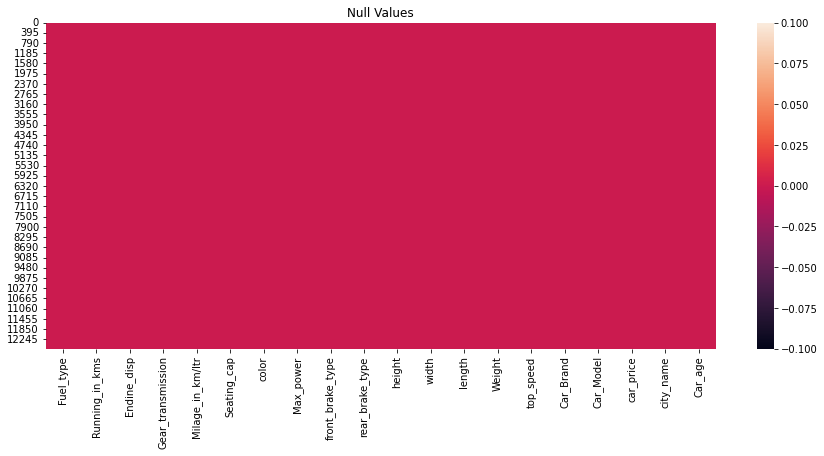

In [51]:
#Visualizeing null values
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Great we have replaced all null values successfully.

In [52]:
#Printing the dataset
df.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Brand,Car_Model,car_price,city_name,Car_age
0,Petrol,131125.0,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,169.0,Maruti,Wagon R,294000.0,ahmedabad,7.0
1,Petrol,73875.0,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,1520.0,165.0,Hyundai,Grand i10,480000.0,ahmedabad,6.0
2,Diesel,97922.0,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,Volkswagen,Vento,711000.0,ahmedabad,3.0
3,Petrol,24230.0,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,169.0,Maruti,S-Presso,422000.0,ahmedabad,2.0
4,Petrol,41174.0,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,Maruti,Wagon R,430000.0,ahmedabad,4.0


In [53]:
#Checking description of data set
df.describe()

,Running_in_kms,Endine_disp,Milage_in_km/ltr,Seating_cap,Max_power,height,width,length,Weight,top_speed,car_price,Car_age
count,1.260800e+04,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,1.260800e+04,12608.000000
mean,5.772259e+04,1436.207249,19.556908,5.218036,100.130872,1563.792989,1718.849540,4083.963089,1603.173065,171.672430,7.709751e+05,6.121352
std,4.027723e+04,494.852497,4.220344,0.693750,44.445694,111.054497,125.361262,398.610518,319.636585,21.392996,1.080141e+06,3.143337
min,2.000000e+02,0.000000,0.000000,2.000000,32.500000,148.000000,1410.000000,3099.000000,1000.000000,86.000000,3.000000e+04,0.000000
25%,3.300000e+04,1197.000000,17.010000,5.000000,74.000000,1488.000000,1675.250000,3765.000000,1510.000000,163.000000,3.510000e+05,4.000000
50%,5.500000e+04,1248.000000,19.600000,5.000000,86.800000,1520.000000,1700.000000,3995.000000,1520.000000,169.000000,5.150000e+05,6.000000
75%,7.586225e+04,1498.000000,22.070000,5.000000,113.400000,1630.000000,1765.000000,4413.000000,1580.000000,175.000000,7.490000e+05,8.000000
max,1.080000e+06,5998.000000,36.000000,10.000000,641.000000,1995.000000,2220.000000,5295.000000,3350.000000,327.000000,3.080000e+07,35.000000


Above is the statistics about the datasets.The mean and the 2nd quantile values are almost same so the skewness and outliers are less in number.

# Visualization:

# Univariate Analysis:

In [54]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


Above are the list of categorical columns.

In [55]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Running_in_kms', 'Endine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed', 'car_price', 'Car_age']


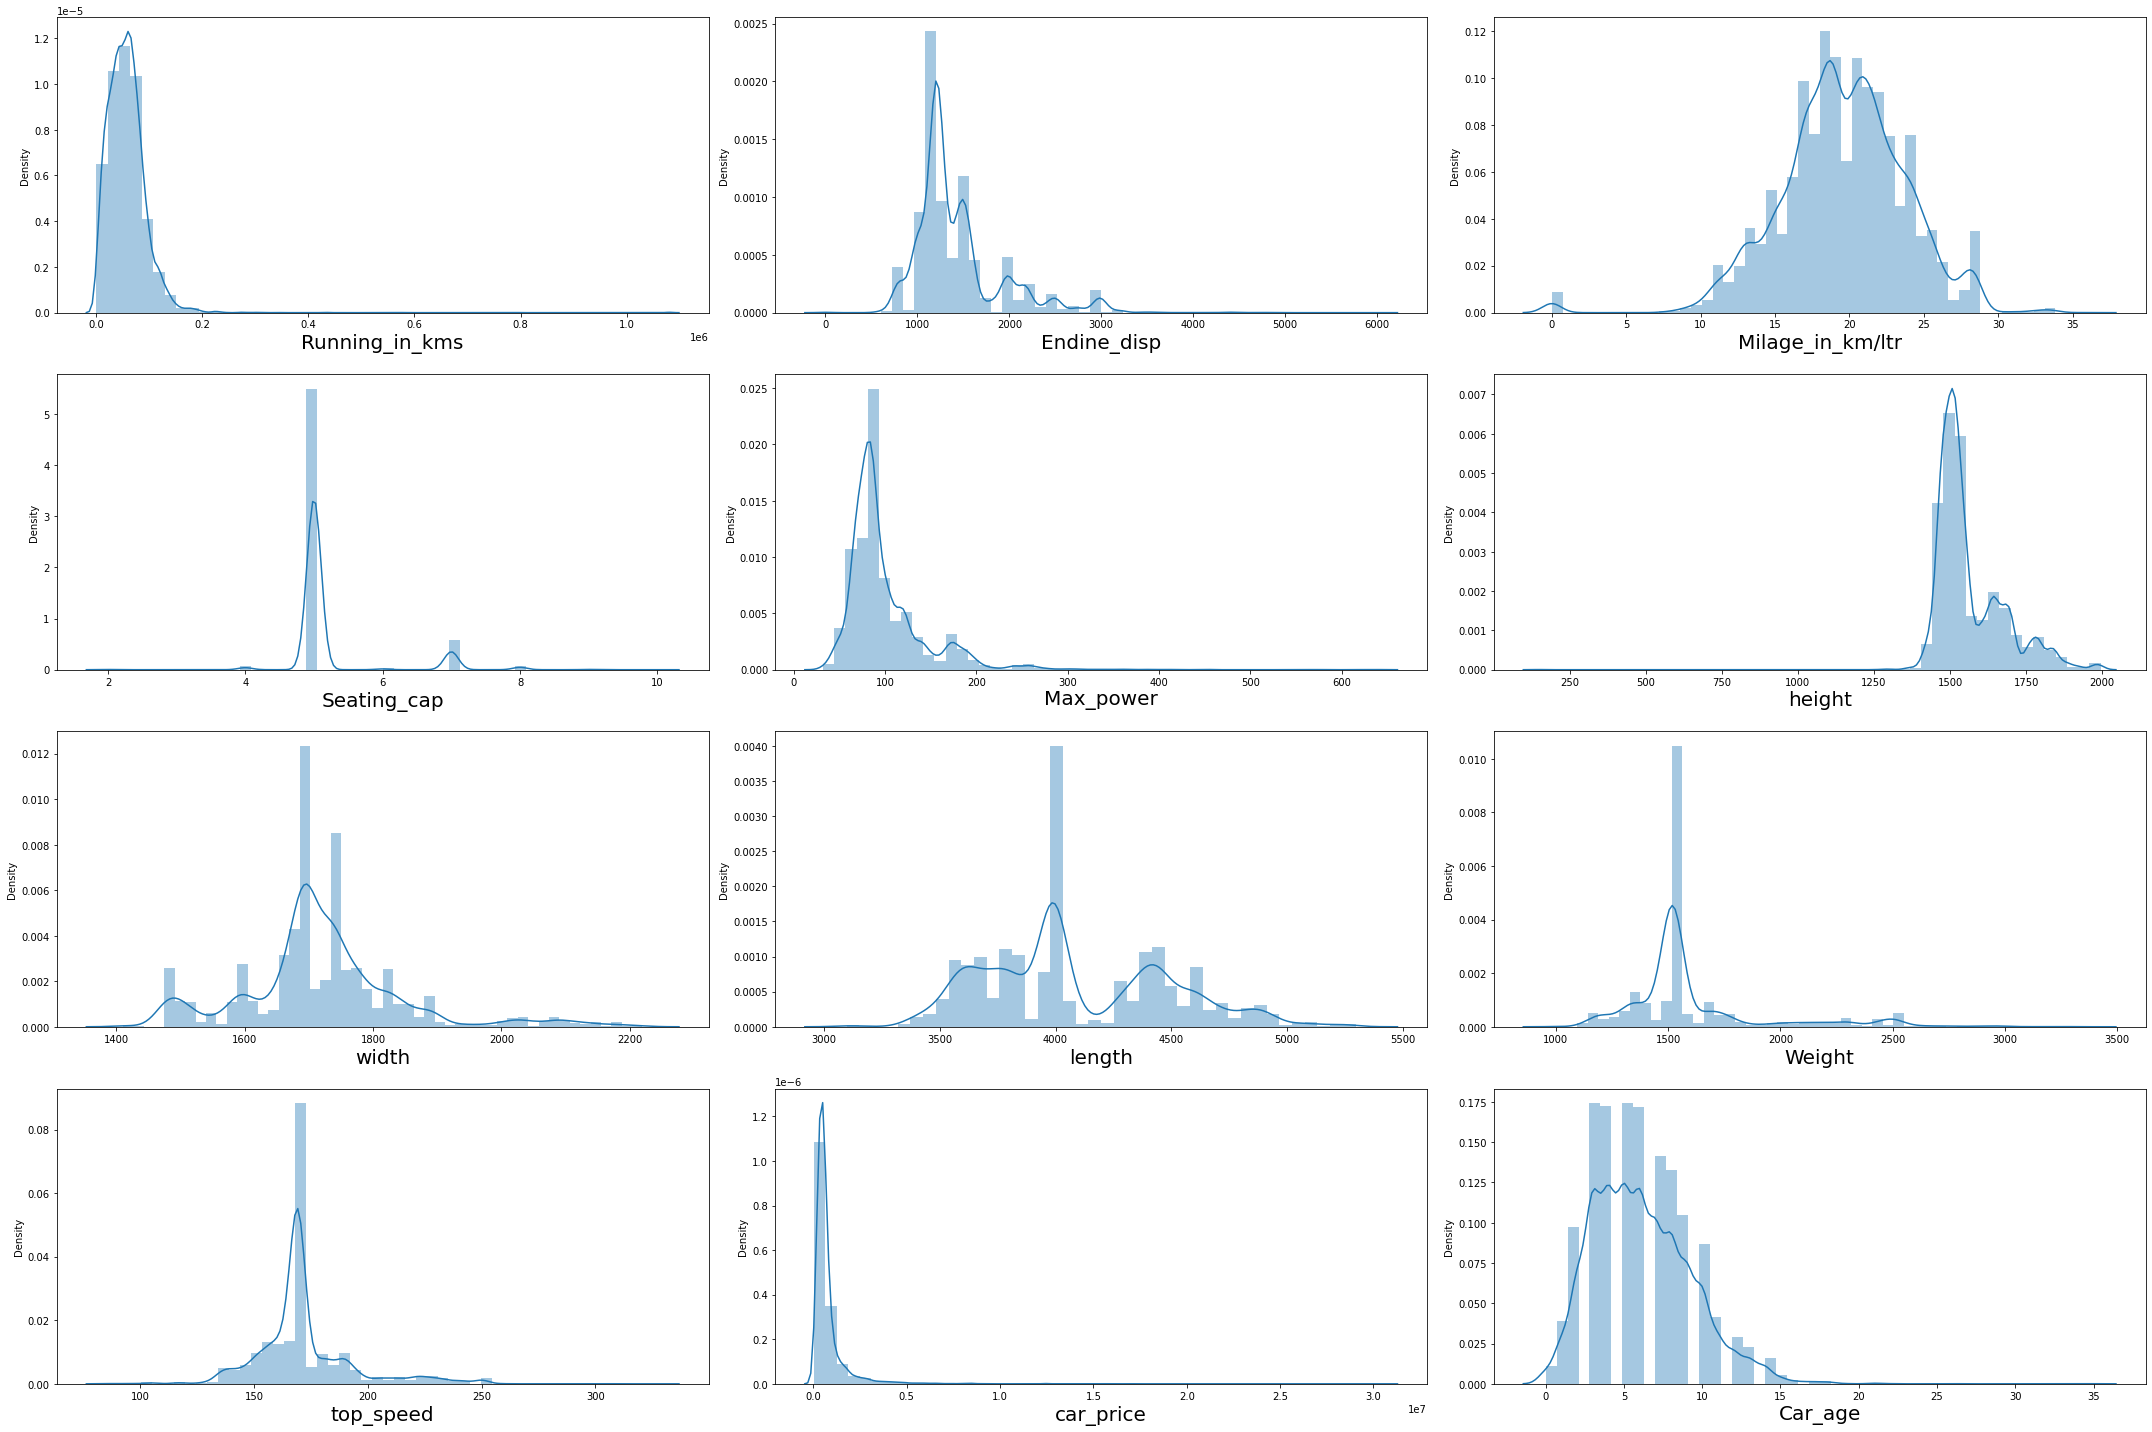

In [56]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,20))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

There is skewness in almost all numerical columns.

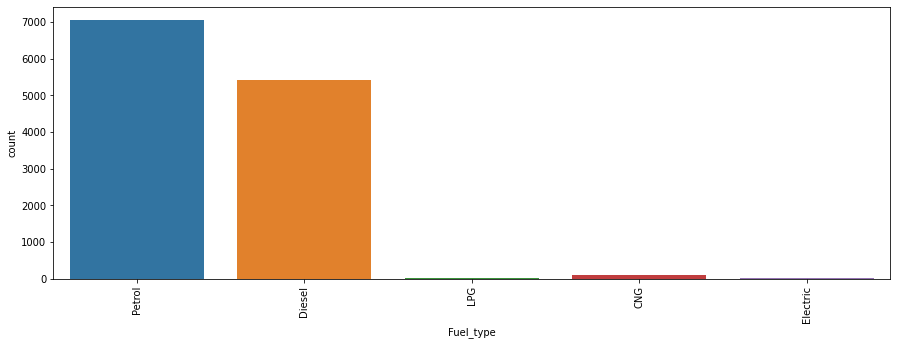

In [57]:
#Count plot for Fuel_type column
plt.figure(figsize=[15,5])
sns.countplot(df['Fuel_type'])
plt.xticks(rotation=90);

Maximum cars are petrol driven and also diesel driven.

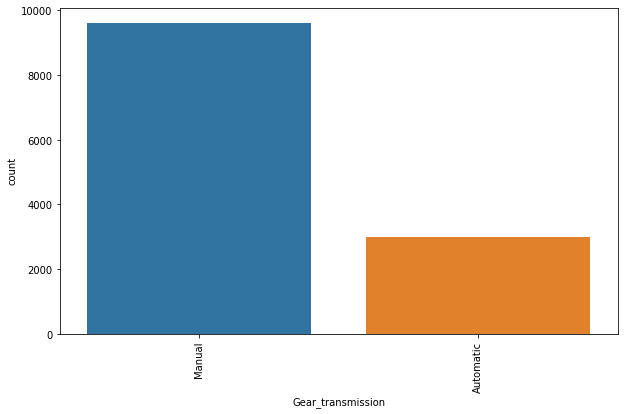

In [58]:
#Count plot for Gear_transmission column
plt.figure(figsize=[10,6])
sns.countplot(df['Gear_transmission'])
plt.xticks(rotation=90);

Maximum cars are with Manual gear transmission.

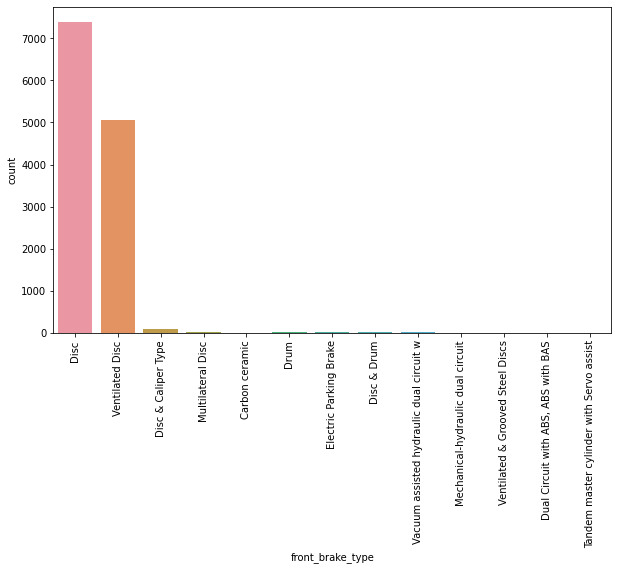

In [59]:
#Count plot for front_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['front_brake_type'])
plt.xticks(rotation=90);

Disc front brake cars are more in number followed by Ventilated Disc.

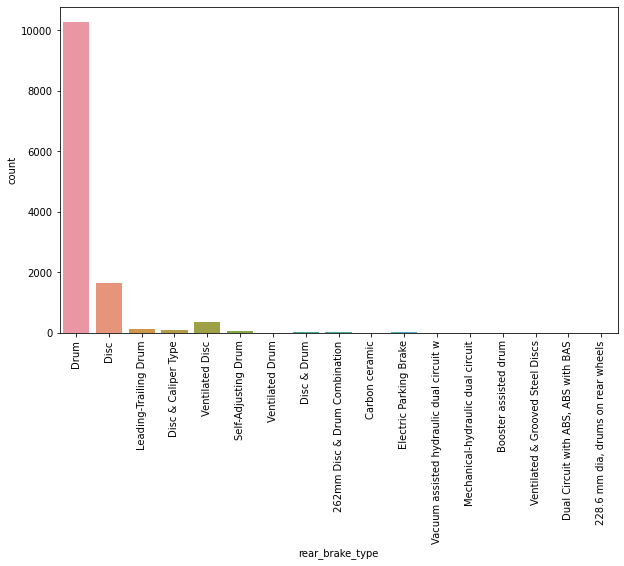

In [60]:
#Count plot for rear_brake_type column
plt.figure(figsize=[10,6])
sns.countplot(df['rear_brake_type'])
plt.xticks(rotation=90);

Drum rare break cars are more in number.

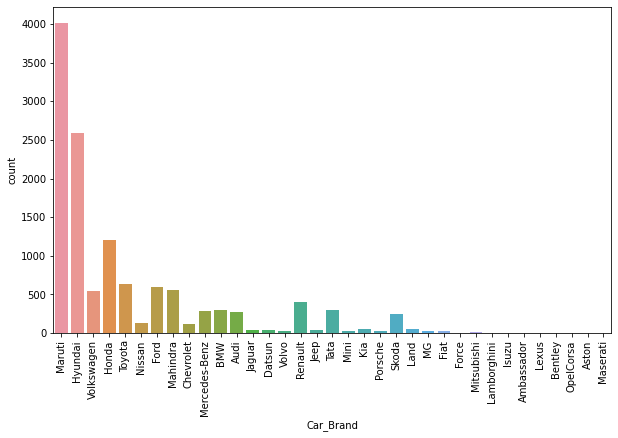

In [61]:
#Count plot for Car_Brand column
plt.figure(figsize=[10,6])
sns.countplot(df['Car_Brand'])
plt.xticks(rotation=90);

Maximum cars under sale are Maruti followed by Hyundai.

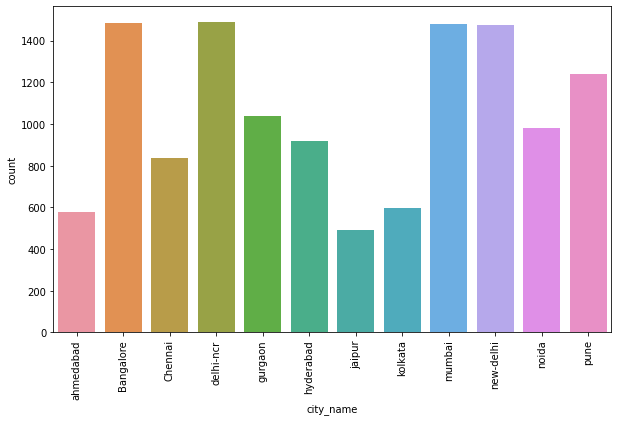

In [62]:
#Count plot for city_name column
plt.figure(figsize=[10,6])
sns.countplot(df['city_name'])
plt.xticks(rotation=90);

In Bangalore,delhi-ncr,mumbai and new-delhi we can find maximum cars for sale. Since these are most populated places.

# Bivariate Analysis:

In [63]:
col=['Running_in_kms', 'Endine_disp', 'Milage_in_km/ltr', 'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed']

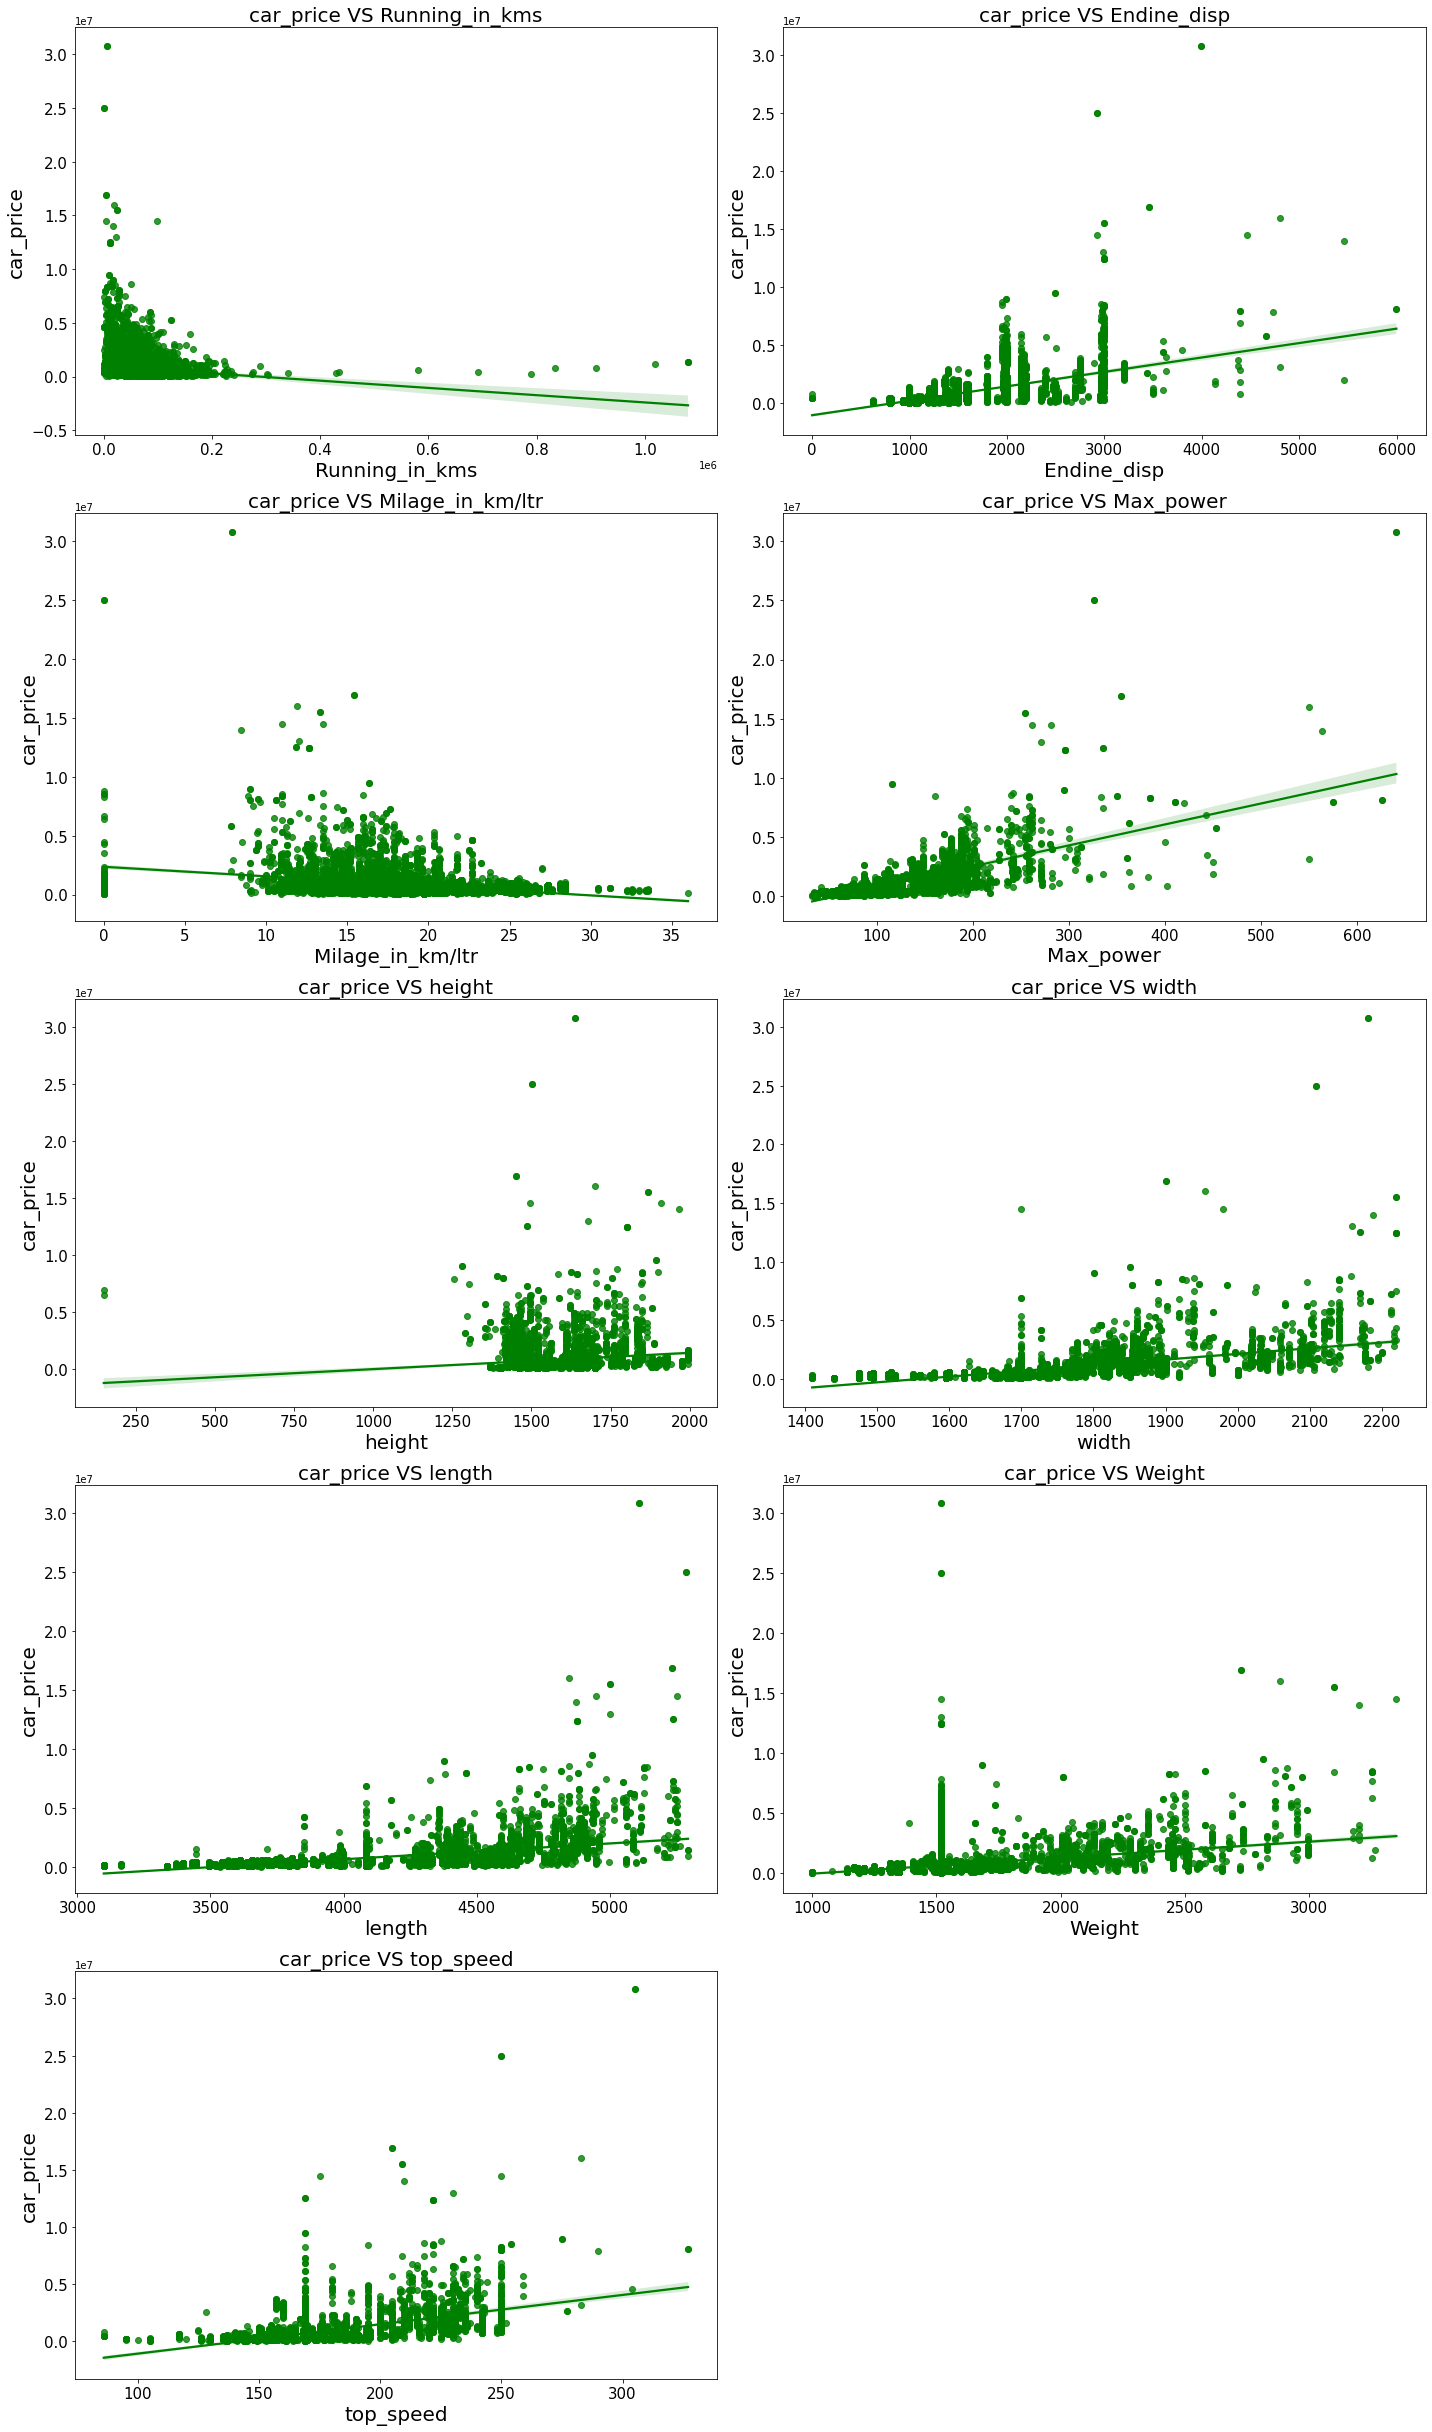

In [64]:
#regplot for numerical columns
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['car_price'],color="g")
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

**Observation:**

- Maximum cars are having below 20k driven kms. And car price is high for less driven cars.
- Maximum cars are having 1000-3000 Endine_disp. And car price is high for 3000 Endine_disp.
- Maximum cars are having milage of 10-25kms. And ,milage has no proper relation with car price.
- As Max_power is increasing car price is also increasing.
- Car_price has no proper relation with height.
- As the width is increasing car price is also increasing.
- As length is increasing car price is also increasing.
- Weight also has linear relationship with car price.
- As top_speed is increasing car price is also increasing.

In [65]:
col1=['Seating_cap','Car_age']

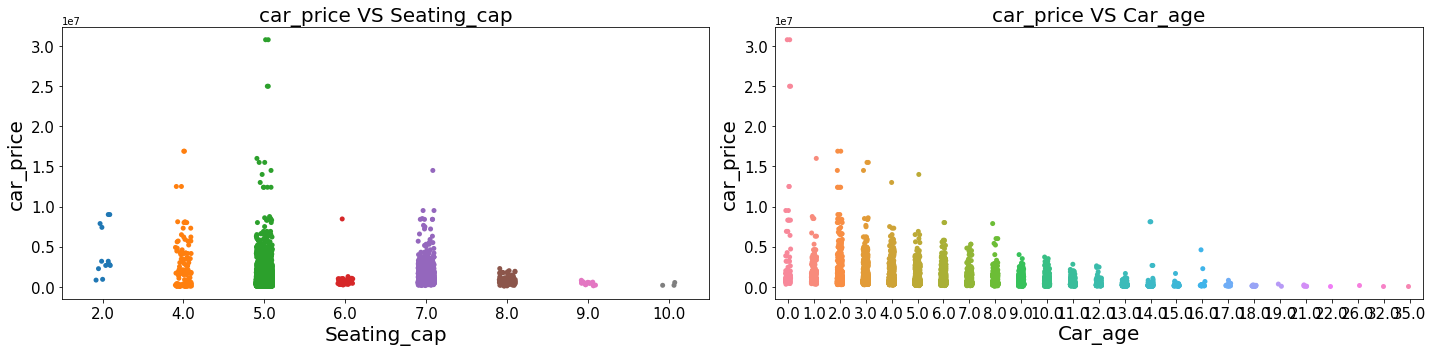

In [66]:
#stripplot for numerical columns
plt.figure(figsize=(20,5))
for i in range(len(col1)):
    plt.subplot(1,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['car_price'])
    plt.title(f"car_price VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

- Cars with 5 and 4 seats are having highest price.
- As the age of the car increases the car price decreases.

In [67]:
col2=['Fuel_type', 'Gear_transmission', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'city_name']

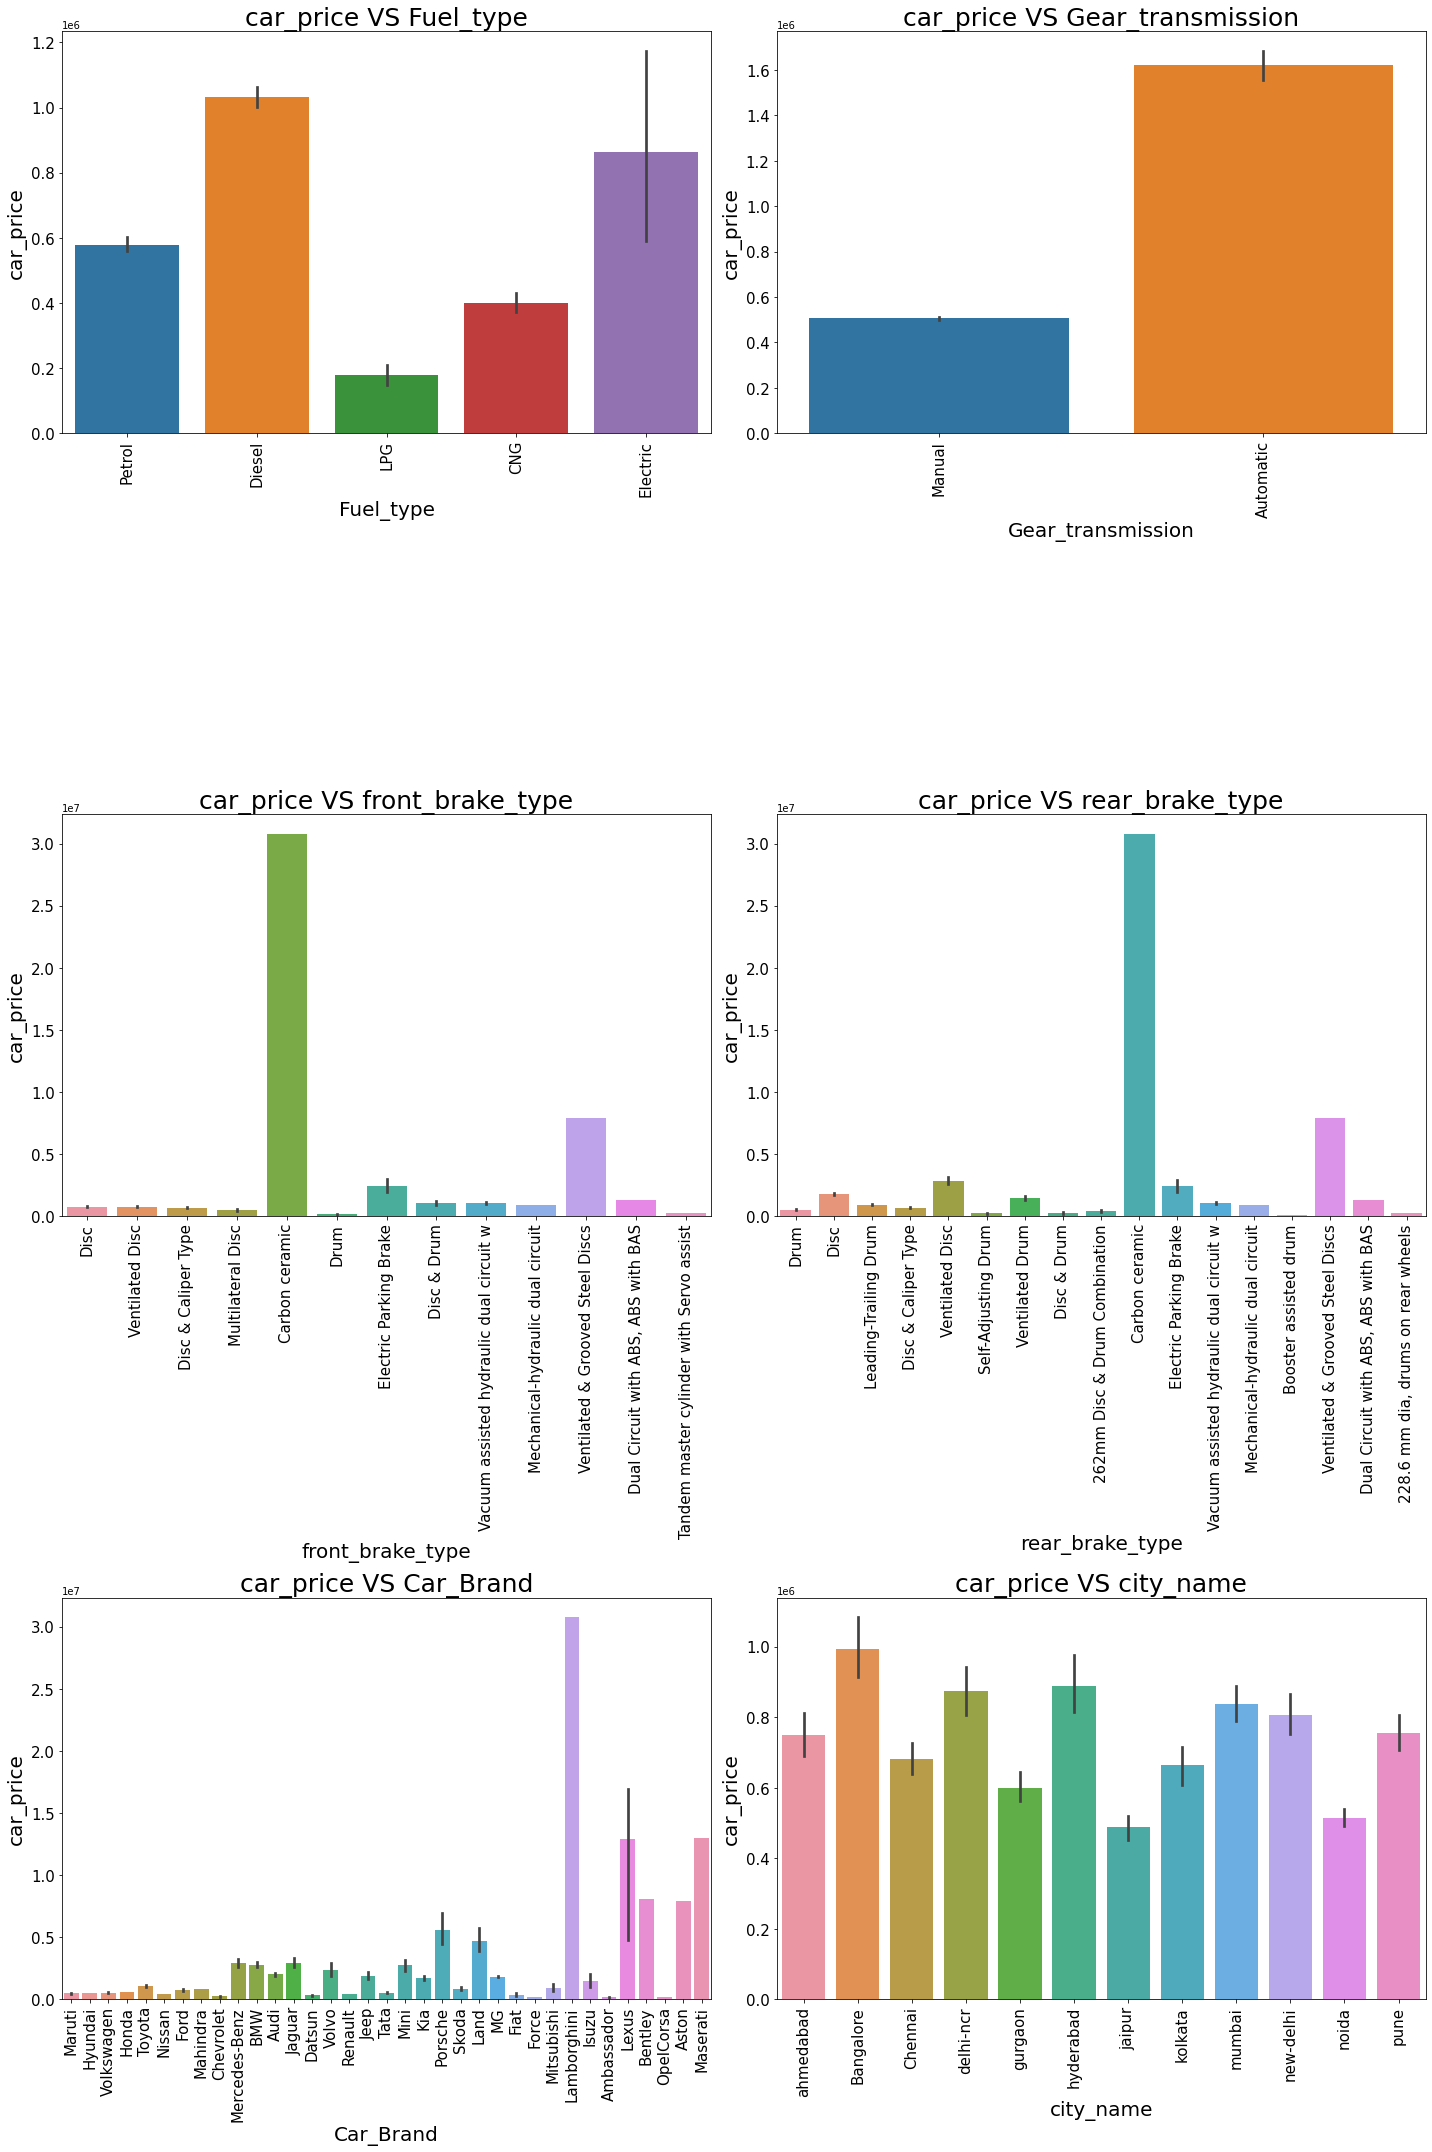

In [68]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,30))
for i in range(len(col2)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['car_price'],x=df[col2[i]])
    plt.title(f"car_price VS {col2[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(col2[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

**Observations:**

- For Diesel and Electric cars the price is high compared to Petrol,LPG and CNG.
- Cars with automatic gear are costlier than manual gear cars.
- Cars with Carbon Ceramic front break are costlier compared to other cars.
- Cars with carbon Ceramic rear braek are costlier compared to other cars.
- Lamborghini brand cars are having highset sale price.
- In Bangalore, Hyderabad and delhi-ncr the car prices are high as they are highly populated cities.

By looking into the pair plot of pair of features we can notice some amount of outliers in each plot so we have to deal with this.

# Checking for outliers:

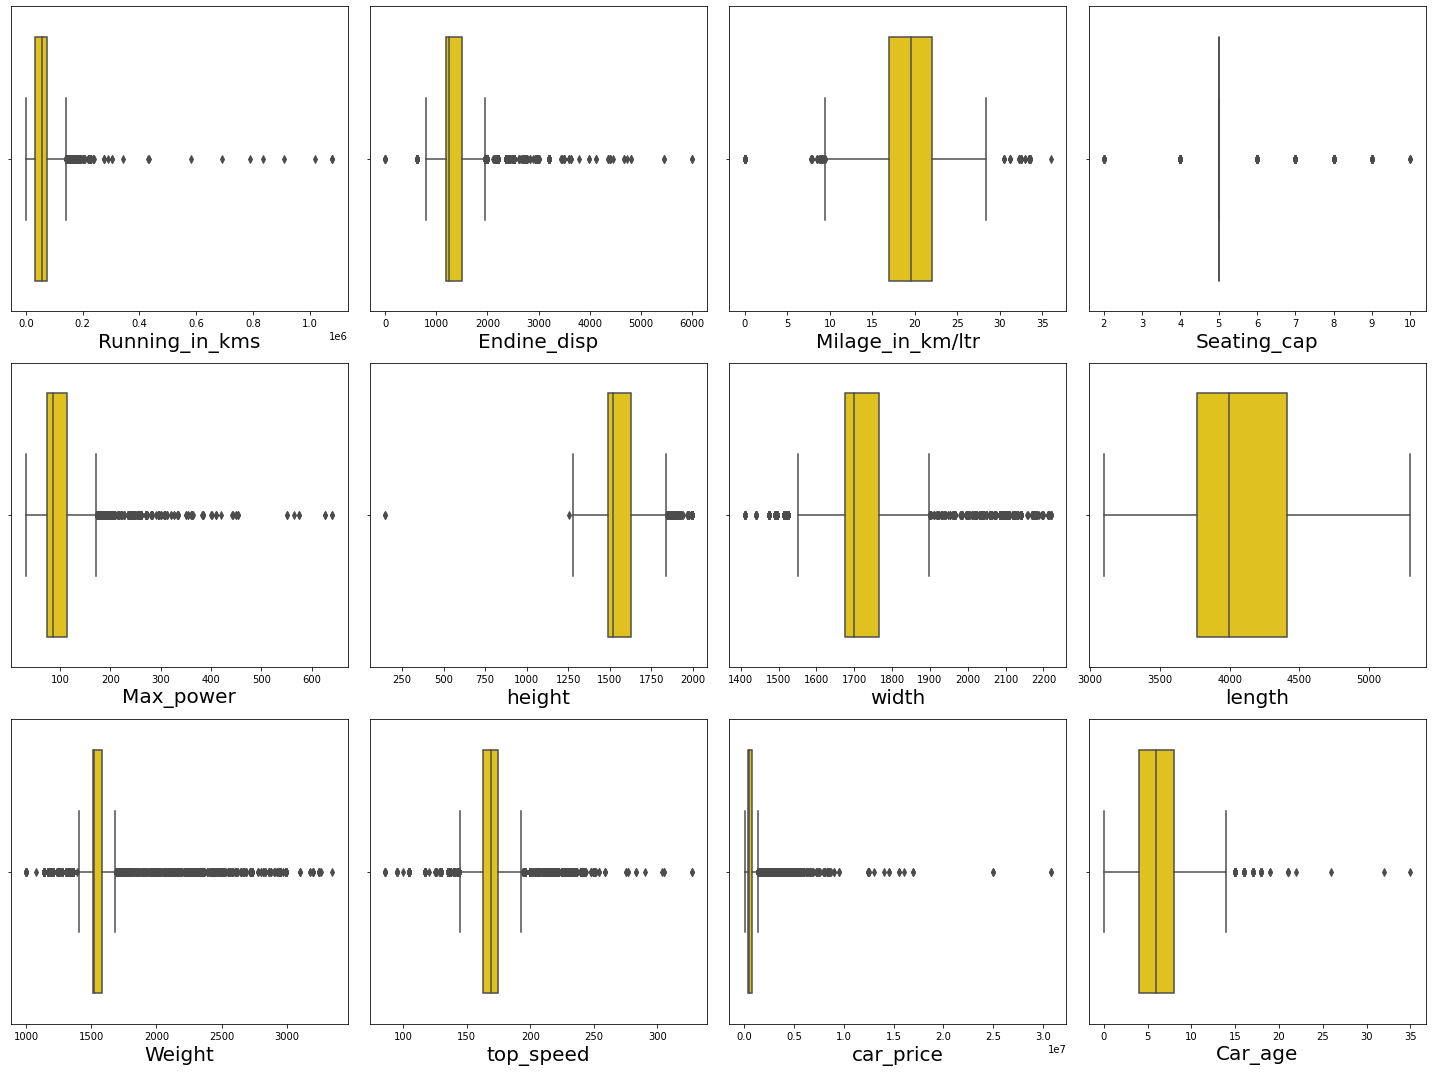

In [71]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in all columns except length. Since car_price is our target we should not remove outliers from it.

# Removing Outliers:

# i) Zscore method:

In [72]:
#Features having outliers 
features=df[['Running_in_kms', 'Endine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'Weight', 'top_speed', 'Car_age']]

Above are the list of columns with outliers in the dataset.

In [73]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Brand,Car_Model,car_price,city_name,Car_age
0,Petrol,131125.0,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,169.0,Maruti,Wagon R,294000.0,ahmedabad,7.0
1,Petrol,73875.0,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,1520.0,165.0,Hyundai,Grand i10,480000.0,ahmedabad,6.0
2,Diesel,97922.0,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,Volkswagen,Vento,711000.0,ahmedabad,3.0
3,Petrol,24230.0,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,169.0,Maruti,S-Presso,422000.0,ahmedabad,2.0
4,Petrol,41174.0,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,Maruti,Wagon R,430000.0,ahmedabad,4.0


In [74]:
#Checking shape of new dataset
df_new.shape

(11481, 20)

In my new dataset i have 11481 rows and 20 columns.

In [75]:
#Checking shape of old dataset
df.shape

(12608, 20)

In my old dataset i have 12608 rows and 20 columns.

In [76]:
#Checking dataloss in zscore method
Dataloss = (((12608-11481)/12608)*100)
Dataloss

8.938769035532996

In Z-score method the data loss is less than 10% still let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [77]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of the dataset using IQR method.

In [78]:
#Checking shape of new dataset
df_1.shape

(6464, 20)

In my new dataset i have 6464 rows and 20 columns.

In [79]:
#Checking shape of old dataset
df.shape

(12608, 20)

In my old dataset i have 12608 rows and 20 columns.

In [80]:
#Checking dataloss in IQR method of the dataset
Dataloss = (((12608-6464)/12608)*100)
Dataloss

48.73096446700508

In IQR method the data loss is more than 10% so let me stick on to Z-score method itself.

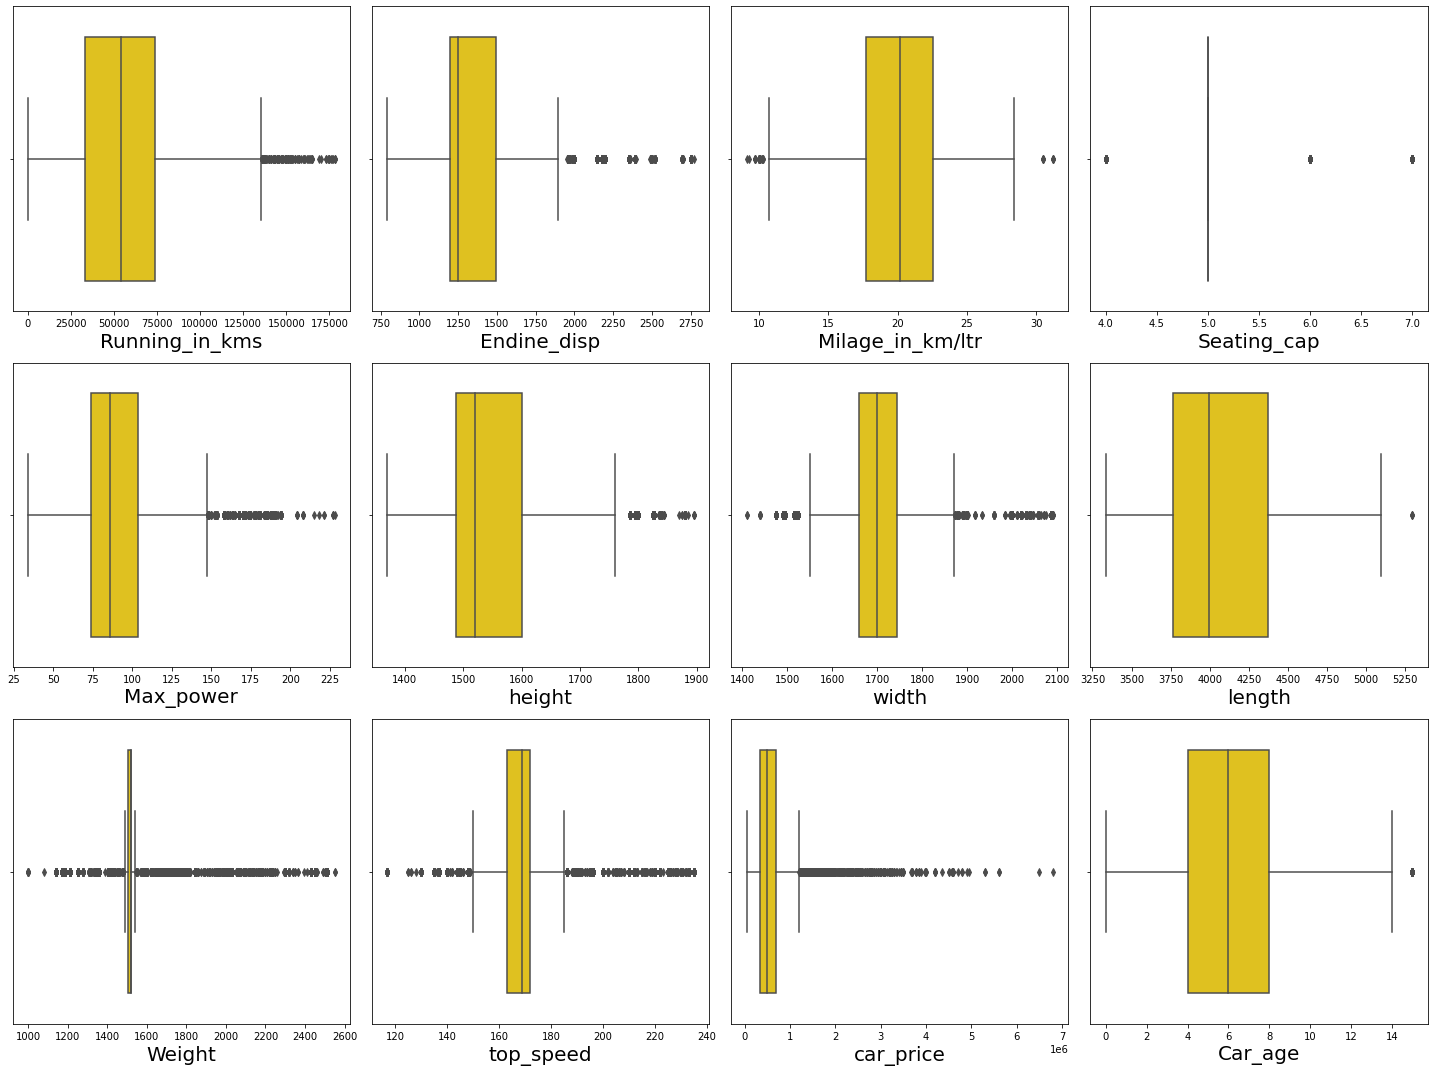

In [81]:
# Checking if the outliers is reduced or not

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df_new[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers has been reduced in all the columns.

# Checking for skewness:

In [82]:
# Now checking for numerical columns
num_columns=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]!='object':
        num_columns.append(i)
print(num_columns)

['Running_in_kms', 'Endine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed', 'car_price', 'Car_age']


In [83]:
#Checking for skewness in the dataset
df_new[num_columns].skew()

Running_in_kms      0.553747
Endine_disp         1.323144
Milage_in_km/ltr    0.094848
Seating_cap         3.187292
Max_power           1.392424
height              1.275943
width               0.358475
length              0.415214
Weight              1.908091
top_speed           0.966678
car_price           3.537058
Car_age             0.489995
dtype: float64

I can notice there is skewness in all the numerical columns except Milage_in_km/ltr,width,length and Car_age. So we have to remove this skewness. Since car_price is my target no need to remove skewness in this column.

# Removing skewness using yeo-johnson method:

In [84]:
#Creating a list of skewed features
fea=['Running_in_kms', 'Endine_disp', 'Seating_cap', 'Max_power', 'height', 'Weight', 'top_speed']

Taking a list as fea with all the columns with skewness.

In [85]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i am removing the skewness.

In [86]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

Got removed from skewness.

In [87]:
#Checking skewness again
df_new[fea].skew()

Running_in_kms   -0.066951
Endine_disp      -0.019124
Seating_cap      -2.369892
Max_power        -0.017556
height            0.000000
Weight           -0.120538
top_speed        -0.049855
dtype: float64

In all the columns skewness has reduced and in height column skewness is zero after removing which means this column has single entry throught out. So let me drop this column as it has no impact on model building.

In [88]:
#Droping height column
df_new = df_new.drop(["height"],axis=1)

# Label Encoding:

In [89]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Car_Brand', 'Car_Model', 'city_name']


Above are the list of categorical columns in df_new.

In [90]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [91]:
df_new[cat_col].head()

,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Car_Brand,Car_Model,city_name
0,4,1,64,0,5,17,176,2
1,4,1,163,0,5,8,85,2
2,1,1,163,5,5,26,169,2
3,4,1,125,5,5,17,136,2
4,4,0,64,5,5,17,176,2


Using label encoder i have encoded the categorical columns.

# Checking correlation using heat map:

In [92]:
cor=df_new.corr()
cor

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,width,length,Weight,top_speed,Car_Brand,Car_Model,car_price,city_name,Car_age
Fuel_type,1.000000,-0.366456,-0.466931,0.010464,-0.322595,-0.189900,-0.022924,-0.277132,-0.072346,0.175211,-0.445961,-0.377342,-0.435803,-0.209243,-0.011471,-0.057383,-0.264371,0.001075,0.002961
Running_in_kms,-0.366456,1.000000,0.235234,0.112165,0.009768,0.084825,0.047637,0.088250,0.126146,-0.029926,0.098911,0.168742,0.202939,0.087301,0.000461,0.041264,-0.209364,0.009958,0.533645
Endine_disp,-0.466931,0.235234,1.000000,-0.307012,-0.459934,0.258043,-0.021936,0.888419,0.035726,-0.400740,0.762580,0.834068,0.709730,0.622660,-0.099083,0.024168,0.539021,-0.020435,0.065863
Gear_transmission,0.010464,0.112165,-0.307012,1.000000,0.289495,0.016509,0.026381,-0.419817,0.036028,0.249026,-0.316690,-0.330819,-0.213069,-0.353655,0.067991,0.090295,-0.496451,0.028802,0.117629
Milage_in_km/ltr,-0.322595,0.009768,-0.459934,0.289495,1.000000,-0.188520,-0.004285,-0.497127,0.038444,0.239103,-0.283154,-0.399172,-0.385836,-0.255270,0.102649,-0.014236,-0.255417,0.036665,-0.233646
Seating_cap,-0.189900,0.084825,0.258043,0.016509,-0.188520,1.000000,0.013384,0.170303,-0.010171,-0.073183,0.200896,0.254421,0.341320,-0.076168,0.092918,0.059382,0.103517,-0.021090,-0.059635
color,-0.022924,0.047637,-0.021936,0.026381,-0.004285,0.013384,1.000000,-0.033060,-0.006231,0.004043,-0.019912,-0.033134,-0.017535,-0.050544,-0.008890,0.038208,-0.033909,0.019021,0.000469
Max_power,-0.277132,0.088250,0.888419,-0.419817,-0.497127,0.170303,-0.033060,1.000000,-0.034228,-0.433055,0.781865,0.835939,0.662255,0.713394,-0.198882,0.020787,0.631624,-0.015664,-0.047097
front_brake_type,-0.072346,0.126146,0.035726,0.036028,0.038444,-0.010171,-0.006231,-0.034228,1.000000,0.118525,-0.060745,-0.026167,-0.022854,0.006635,0.033393,-0.044090,-0.083888,0.014070,0.198085
rear_brake_type,0.175211,-0.029926,-0.400740,0.249026,0.239103,-0.073183,0.004043,-0.433055,0.118525,1.000000,-0.333729,-0.395652,-0.279426,-0.307627,-0.002777,-0.052151,-0.360607,0.026345,-0.016757


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

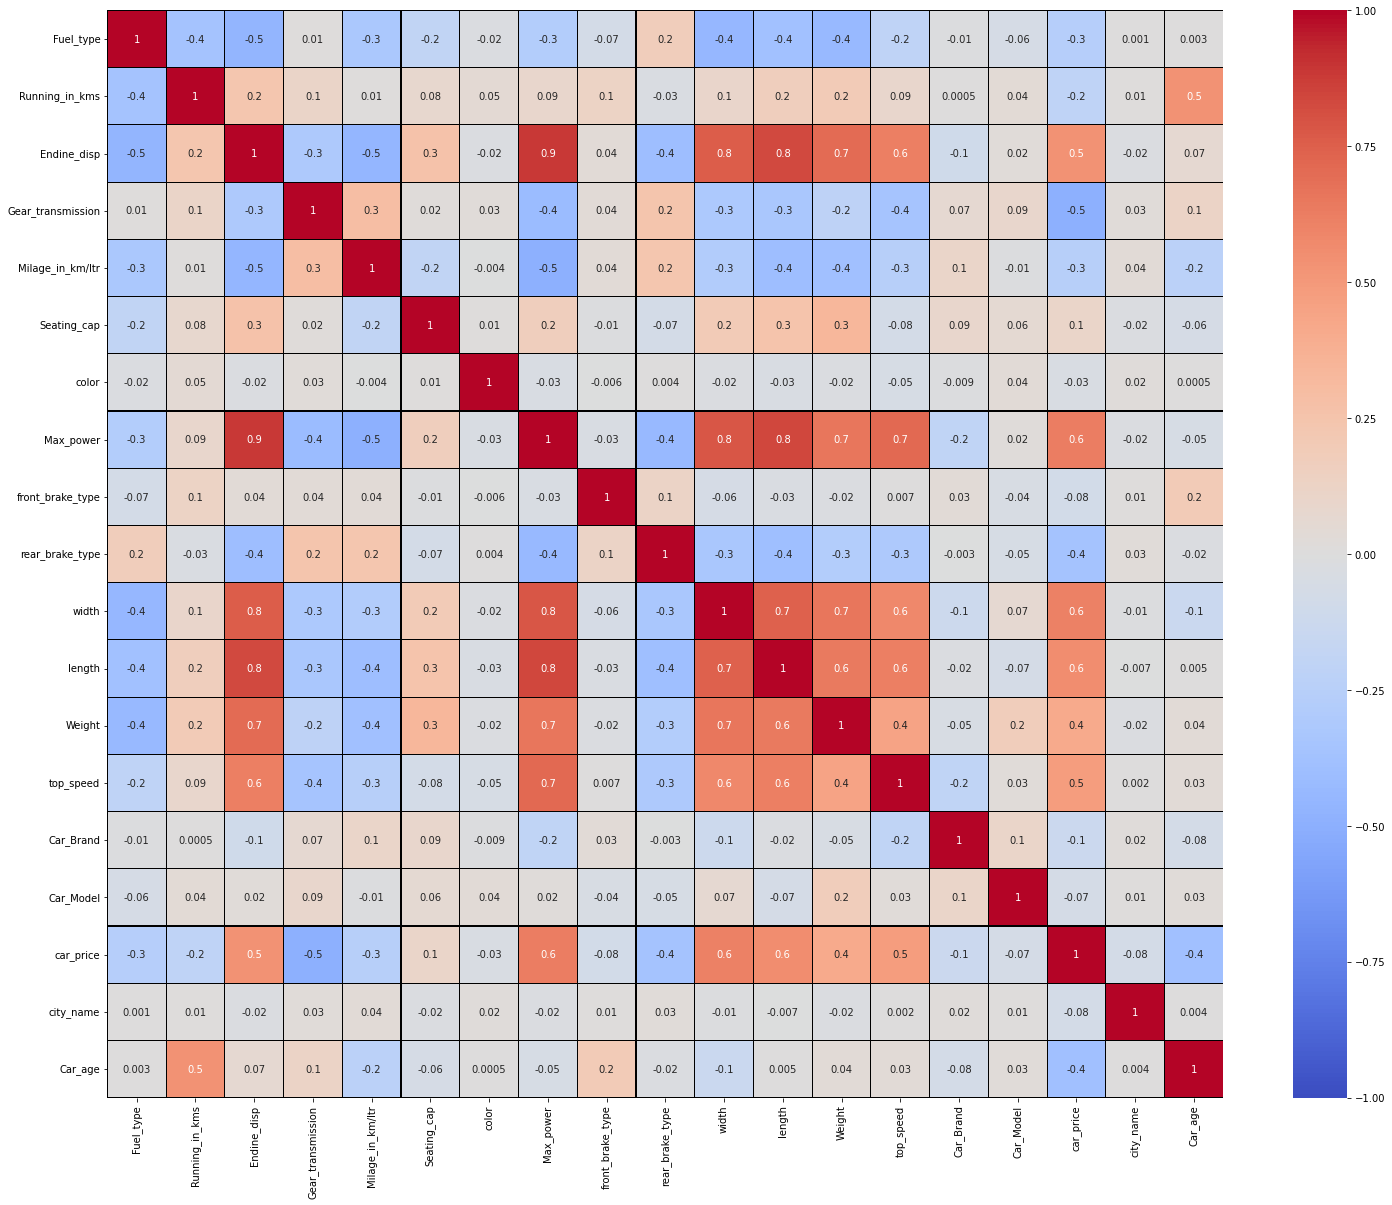

In [93]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

I can notice there is multicolinearity issue in the dataset. So we have to use VIF to remove multicolinearity.

Let's visualize the correlation of all the features with target to get better insight.

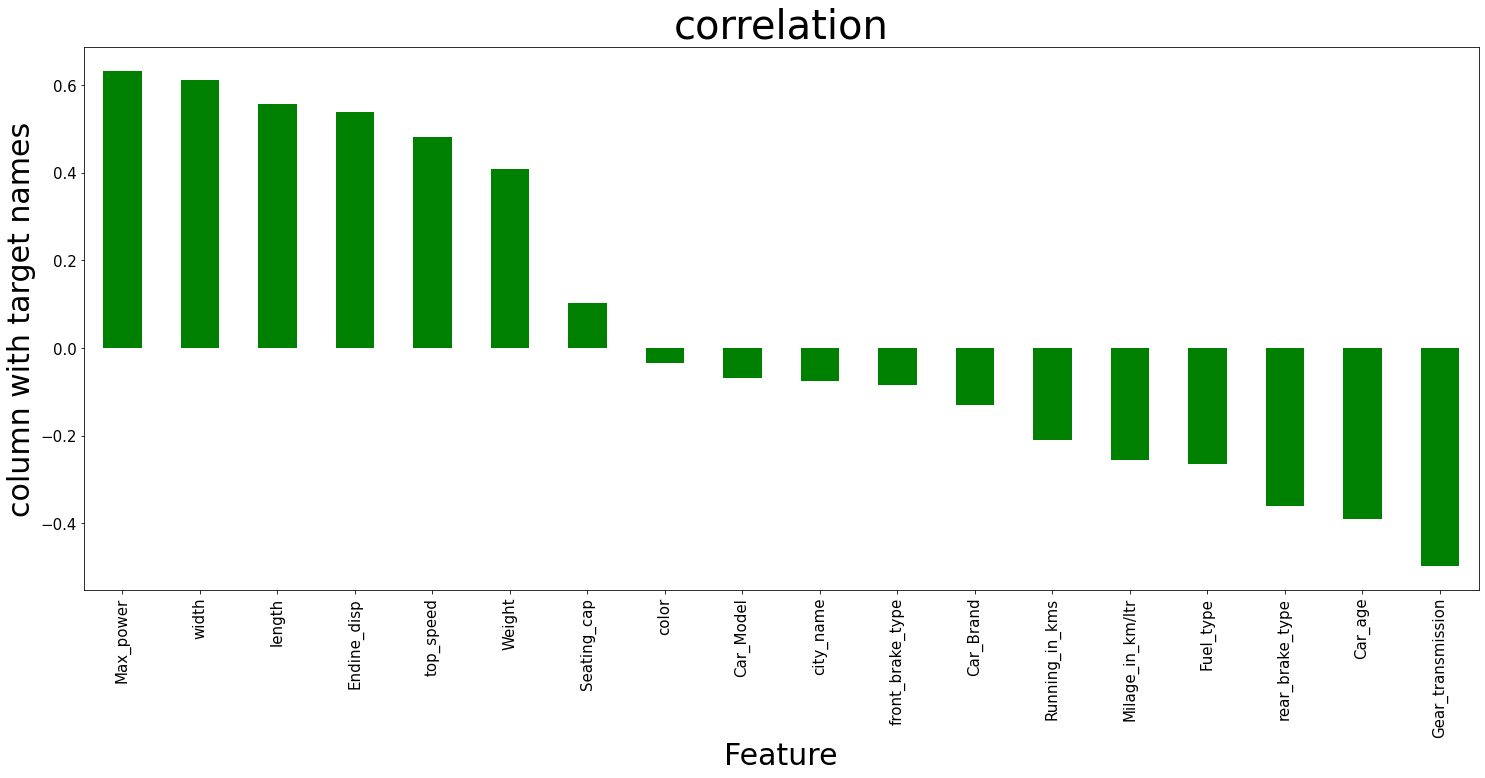

In [94]:
plt.figure(figsize=(25,10))
df_new.corr()['car_price'].sort_values(ascending=False).drop(['car_price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

color is less correlated with target. But will keep it and continue.

# Separating Features and Target:

In [95]:
x = df_new.drop("car_price",axis=1)
y = df_new["car_price"]

I have separated my target and independent columns.

# Scaling the data using Standard scaler:

In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using Standard scaler.

In [97]:
X.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,width,length,Weight,top_speed,Car_Brand,Car_Model,city_name,Car_age
0,0.821974,2.130695,-1.195810,0.511787,0.470290,-0.19967,-0.939515,-1.002315,-0.810819,0.287785,-0.790362,-1.073736,-1.079309,0.030349,0.475229,1.119280,-0.997096,0.336469
1,0.821974,0.676649,-0.323042,0.511787,-0.340682,-0.19967,1.064776,-0.221629,-0.810819,0.287785,-0.415408,-0.765969,0.027186,-0.215359,-0.853907,-0.371963,-0.997096,0.000351
2,-1.208525,1.327903,0.627849,0.511787,0.604985,-0.19967,1.064776,0.729578,1.241794,0.287785,-0.049827,0.982707,0.991807,0.653755,1.804364,1.004569,-0.997096,-1.008003
3,0.821974,-1.041906,-1.195810,0.511787,0.445035,-0.19967,0.295453,-1.002315,1.241794,0.287785,-1.727747,-1.325546,-2.600515,0.030349,0.475229,0.463788,-0.997096,-1.344121
4,0.821974,-0.366963,-1.195810,-1.953939,0.111106,-0.19967,-0.939515,-1.005376,1.241794,0.287785,-1.962093,-1.230418,-1.006562,-1.096125,0.475229,1.119280,-0.997096,-0.671885


This is the data of independent variables after scaling.

# Checking for multicolinearity issue using VIF:

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.379790,Fuel_type
1,1.777252,Running_in_kms
2,8.980763,Endine_disp
3,1.348078,Gear_transmission
4,3.210551,Milage_in_km/ltr
5,1.334998,Seating_cap
6,1.013441,color
7,10.009658,Max_power
8,1.095950,front_brake_type
9,1.310114,rear_brake_type


In [99]:
#Droping high VIF columns
X = X.drop(["Max_power"],axis=1)

In [100]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.150828,Fuel_type
1,1.777250,Running_in_kms
2,6.094087,Endine_disp
3,1.308243,Gear_transmission
4,3.207531,Milage_in_km/ltr
5,1.329129,Seating_cap
6,1.013429,color
7,1.095948,front_brake_type
8,1.281711,rear_brake_type
9,3.321526,width


Now the multicolinearity issue is solved.

# Finding Best Random State and Accuracy:

In [101]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9658068916865558  on Random_state  114


I got the best accuracy and random state.

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:

In [104]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [105]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 96.59040318013854
mean_squared_error: 8898886369.94504
mean_absolute_error: 50460.44764563319
root_mean_squared_error: 94333.90890843568

Cross validation score : 93.04199593407235

R2_Score - Cross Validation Score : 3.5484072460661906


# ii) XGBRegressor:

In [106]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

[12:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2_score: 94.90530613827012
mean_squared_error: 13296909916.473036
mean_absolute_error: 71774.88464033019
root_mean_squared_error: 115312.22795728577
[12:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now de

# iii) GradientBoostingRegressor:

In [107]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 94.92463739776873
mean_squared_error: 13246456243.867523
mean_absolute_error: 71285.612608969
root_mean_squared_error: 115093.25020985167

Cross validation score : 90.21103303115027

R2_Score - Cross Validation Score : 4.713604366618469


# iv) DecisionTreeRegressor:

In [108]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 92.08778253214294
mean_squared_error: 20650513213.352684
mean_absolute_error: 63565.747460087085
root_mean_squared_error: 143702.86431853988

Cross validation score : 88.88438259743741

R2_Score - Cross Validation Score : 3.20339993470553


# v) Bagging Regressor:

In [109]:
BR=BaggingRegressor()
BR.fit(X_train,y_train)
pred=BR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(BR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 96.09573341664313
mean_squared_error: 10189951046.668966
mean_absolute_error: 54223.09514916949
root_mean_squared_error: 100945.28739207673

Cross validation score : 92.22516173338849

R2_Score - Cross Validation Score : 3.8705716832546386


# Hyper parameter tunning for best model:

In [110]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [111]:
parameter = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'splitter':['best','random'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
             'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

Giving DecisionTreeRegressor parameters.

In [112]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=10)

Running grid search CV for ExtraTreesRegressor.

Tunning the model using GCV.

Got the best parameters for DecisionTreeRegressor.

In [119]:
Best_mod=DecisionTreeRegressor(criterion='friedman_mse',max_depth=15,max_features='auto',min_samples_split=4,splitter='random')
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 92.94036037484042
mean_squared_error: 18425325384.838062
mean_absolute_error: 70852.59114405994
RMSE value: 135739.91817014647


**This is my model r2_score after tuning.I got 92.29% as r2_score which is gooddd!!!.Before model accuracy was 91.79% now after tunning it is 92.29%.**

# Saving the model:

In [120]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Car_Price.pkl")

['Car_Price.pkl']

I have saved my model as Car_Price Using .pkl

# Predictions:

In [121]:
# Loading the saved model
model=joblib.load("Car_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([ 354500.        , 1650000.        ,  400000.        , ...,
        557000.        ,  200000.        ,  397142.85714286])

Above are the predicted values and the actual values.They are almost similar.

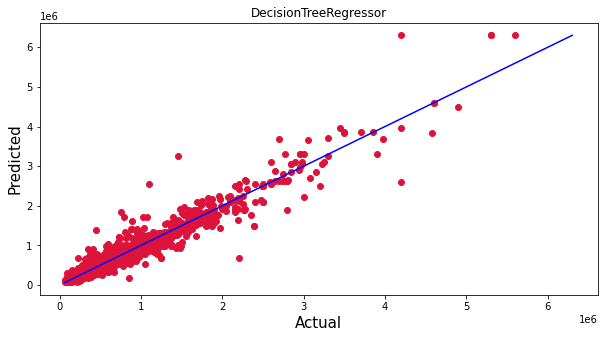

In [122]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("DecisionTreeRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

# Thank You:)